# wine데이터로 실루엣 분석

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
wineDF = pd.DataFrame(wine.data, columns=wine.feature_names)
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


### K- Means 모델 생성/학습

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(wineDF)

KMeans(n_clusters=3, random_state=2021)

In [4]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

In [5]:
wineDF['target'] = wine.target
wineDF['cluster'] = kmeans.labels_
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


In [6]:
clustering_result = wineDF.groupby(['target', 'cluster'])['alcohol'].count()
clustering_result.head()

target  cluster
0       0          46
        1          13
1       0           1
        1          20
        2          50
Name: alcohol, dtype: int64

### 군집화 결과를 차원축소하여 시각화

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

pca = PCA(n_components=2) #2차원으로 축소
wine_pca = pca.fit_transform(wine_std)

In [8]:
wineDF['pca_x'] = wine_pca[:, 0] # 행은 전부 열은 첫번째
wineDF['pca_y'] =  wine_pca[:, 1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831


In [9]:
# wine.target_names

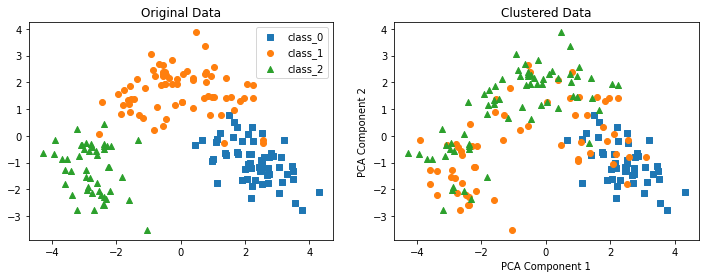

In [10]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']
markers=['s', 'o', '^']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column]==i]['pca_x']
        y_axis_data = wineDF[wineDF[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data,
        marker=marker, label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [20]:
wineDF1 = pd.DataFrame(wine.data, columns=wine.feature_names)
wineDF1.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [23]:
from sklearn.pipeline import make_pipeline

scaler1 = StandardScaler()
kmeans1 = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler1, kmeans1)
pipeline.fit(wineDF1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [24]:
kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
wineDF1['target'] = wine.target
wineDF1['cluster'] = kmeans1.labels_
wineDF1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


In [26]:
wine_std1 = scaler1.fit_transform(wine.data)
pca1 = PCA(n_components=2) #2차원으로 축소
wine_pca1 = pca.fit_transform(wine_std1)

In [27]:
wineDF1['pca_x'] = wine_pca1[:, 0] # 행은 전부 열은 첫번째
wineDF1['pca_y'] =  wine_pca1[:, 1]
wineDF1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831


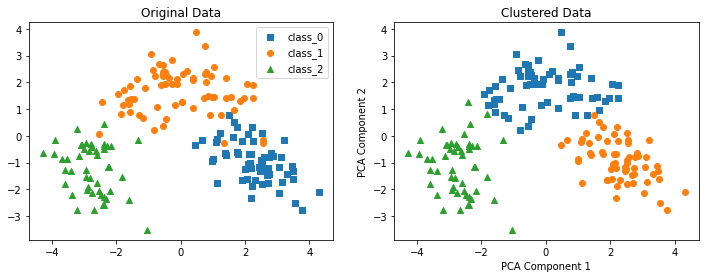

In [28]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']
markers=['s', 'o', '^']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wineDF1[wineDF1[column]==i]['pca_x']
        y_axis_data = wineDF1[wineDF1[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data,
        marker=marker, label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## 실루엣 분석(Silhouette Analysis)

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(wine.data, wineDF.cluster)
wineDF['실루엣계수'] = score_samples
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y,실루엣계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,3.316751,-1.443463,0.516178
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,2.209465,0.333393,0.482042
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,2.516740,-1.031151,0.684513
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,3.757066,-2.756372,0.593218
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1.008908,-0.869831,0.688007


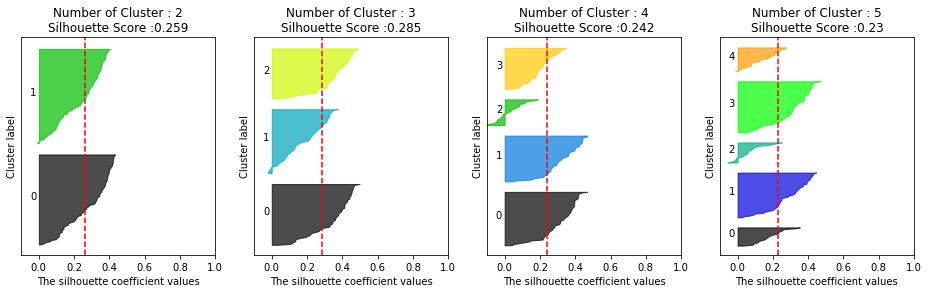

In [12]:
from visualize import visualize_silhouette

visualize_silhouette([2, 3, 4, 5], wine_std)

### Clustring 알고리즘 테스트를 위한 데이터 생성

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                    cluster_std=2, random_state=2021) # cluster_std : 표준편차를 0.8로 줌
print(X.shape, y.shape)

(200, 2) (200,)


In [14]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts) # 0: 67, 1:67, 2: 66

[0 1 2] [67 67 66]


In [15]:
clusterDF = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-4.320906,-1.611244,1
1,9.775812,-12.110993,2
2,9.704168,-9.889786,2
3,7.968703,-8.501582,2
4,-6.604841,0.548545,1


In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=3, random_state=2021)
unique, counts = np.unique(y, return_counts=True)
clusterDF_3 = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF_3['target'] = y
clusterDF_3.head()

,ftr1,ftr2,target
0,-2.870830,-0.543596,1
1,9.691286,-14.448113,2
2,9.583819,-11.116303,2
3,6.980622,-9.033997,2
4,-6.296733,2.696087,1


In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=4, random_state=2021)
unique, counts = np.unique(y, return_counts=True)
clusterDF_4 = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF_4['target'] = y
clusterDF_4.head()

,ftr1,ftr2,target
0,-1.420755,0.524051,1
1,9.606759,-16.785233,2
2,9.463470,-12.342820,2
3,5.992541,-9.566412,2
4,-5.988626,4.843629,1


In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=5, random_state=2021)
unique, counts = np.unique(y, return_counts=True)
clusterDF_5 = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
clusterDF_5['target'] = y
clusterDF_5.head()

,ftr1,ftr2,target
0,0.029321,1.591698,1
1,9.522232,-19.122353,2
2,9.343122,-13.569337,2
3,5.004460,-10.098826,2
4,-5.680518,6.991171,1


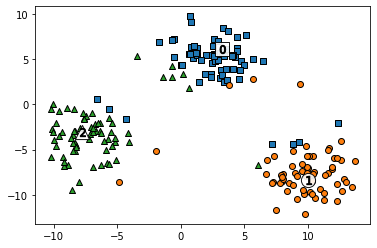

In [19]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()